In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-brainwave-emotion/emotions.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
data= pd.read_csv('/kaggle/input/eeg-brainwave-emotion/emotions.csv')

# Inspect the first few rows
print(data.head())

# Separate features and target
X = data.drop(columns=['label'])  # Assuming 'label' is the target column
y = data['label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Handle missing values by imputing with the mean for numeric features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features (important for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

Training Logistic Regression...
Logistic Regression Accuracy: 0.9766
Logistic Regression Precision: 0.9764
Logistic Regression Recall: 0.9760
Logistic Regression F1 Score: 0.9761
Training Time: 4.8142 seconds

Training Random Forest...
Random Forest Accuracy: 0.9883
Random Forest Precision: 0.9882
Random Forest Recall: 0.9881
Random Forest F1 Score: 0.9881
Training Time: 4.5927 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9602
Decision Tree Precision: 0.9598
Decision Tree Recall: 0.9593
Decision Tree F1 Score: 0.9595
Training Time: 3.7079 seconds

Training KNN...
KNN Accuracy: 0.9321
KNN Precision: 0.9356
KNN Recall: 0.9296
KNN F1 Score: 0.9295
Training Time: 0.0049 seconds

Training SVM...
SVM Accuracy: 0.9766
SVM Precision: 0.9764
SVM Recall: 0.9762
SVM F1 Score: 0.9763
Training Time: 4.9667 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.9110
AdaBoost Precision: 0.9159
AdaBoost Recall: 0.9085
AdaBoost F1 Score: 0.9088
Training Time: 56.5018 seconds

Training Gauss

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/di

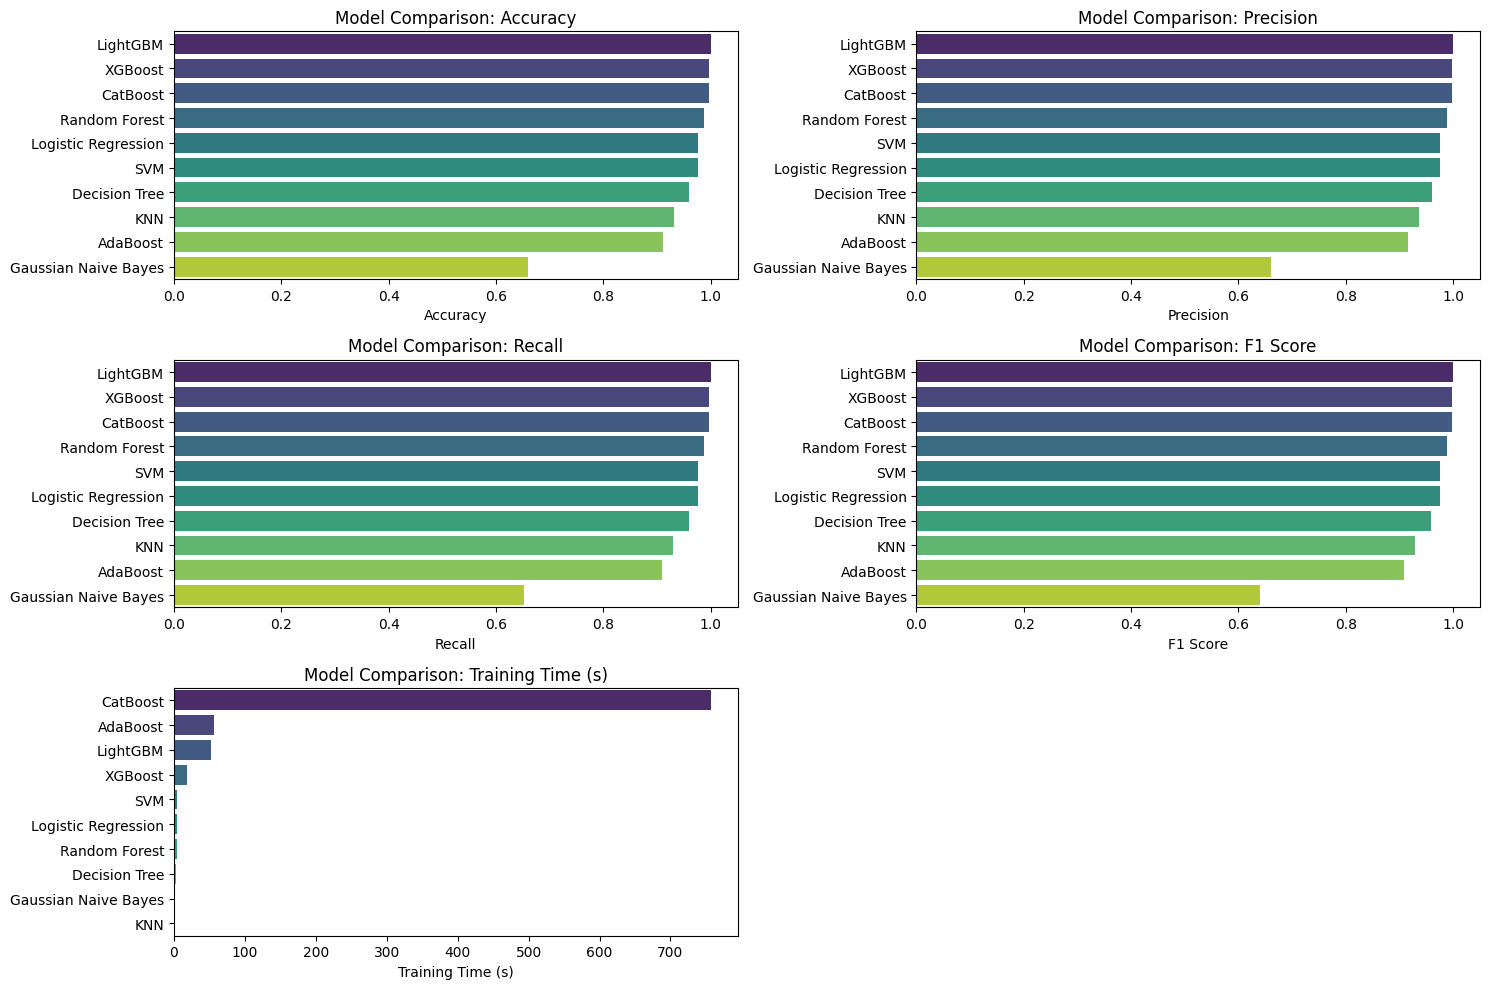

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.barplot(x=scores, y=models, palette='viridis')
        plt.xlabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9859
Logistic Regression Precision: 0.9861
Logistic Regression Recall: 0.9854
Logistic Regression F1 Score: 0.9856
Training Time: 1.5988 seconds

Training Random Forest...
Random Forest Accuracy: 0.9883
Random Forest Precision: 0.9884
Random Forest Recall: 0.9879
Random Forest F1 Score: 0.9880
Training Time: 2.2760 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9625
Decision Tree Precision: 0.9627
Decision Tree Recall: 0.9625
Decision Tree F1 Score: 0.9623
Training Time: 2.7609 seconds

Training KNN...
KNN Accuracy: 0.9649
KNN Precision: 0.9662
KNN Recall: 0.9636
KNN F1 Score: 0.9640
Training Time: 0.0051 seconds

Training SVM...
SVM Accuracy: 0.9836
SVM Precision: 0.9833
SVM Recall: 0.9836
SVM F1 Score: 0.9834
Training Time: 7.6304 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.7049
AdaBoost Precision: 0.8120
AdaBoost Recall: 0.7063
AdaBoost F1 Score: 0.6445
Training Time: 28.6879 seconds

Training Gauss

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/di

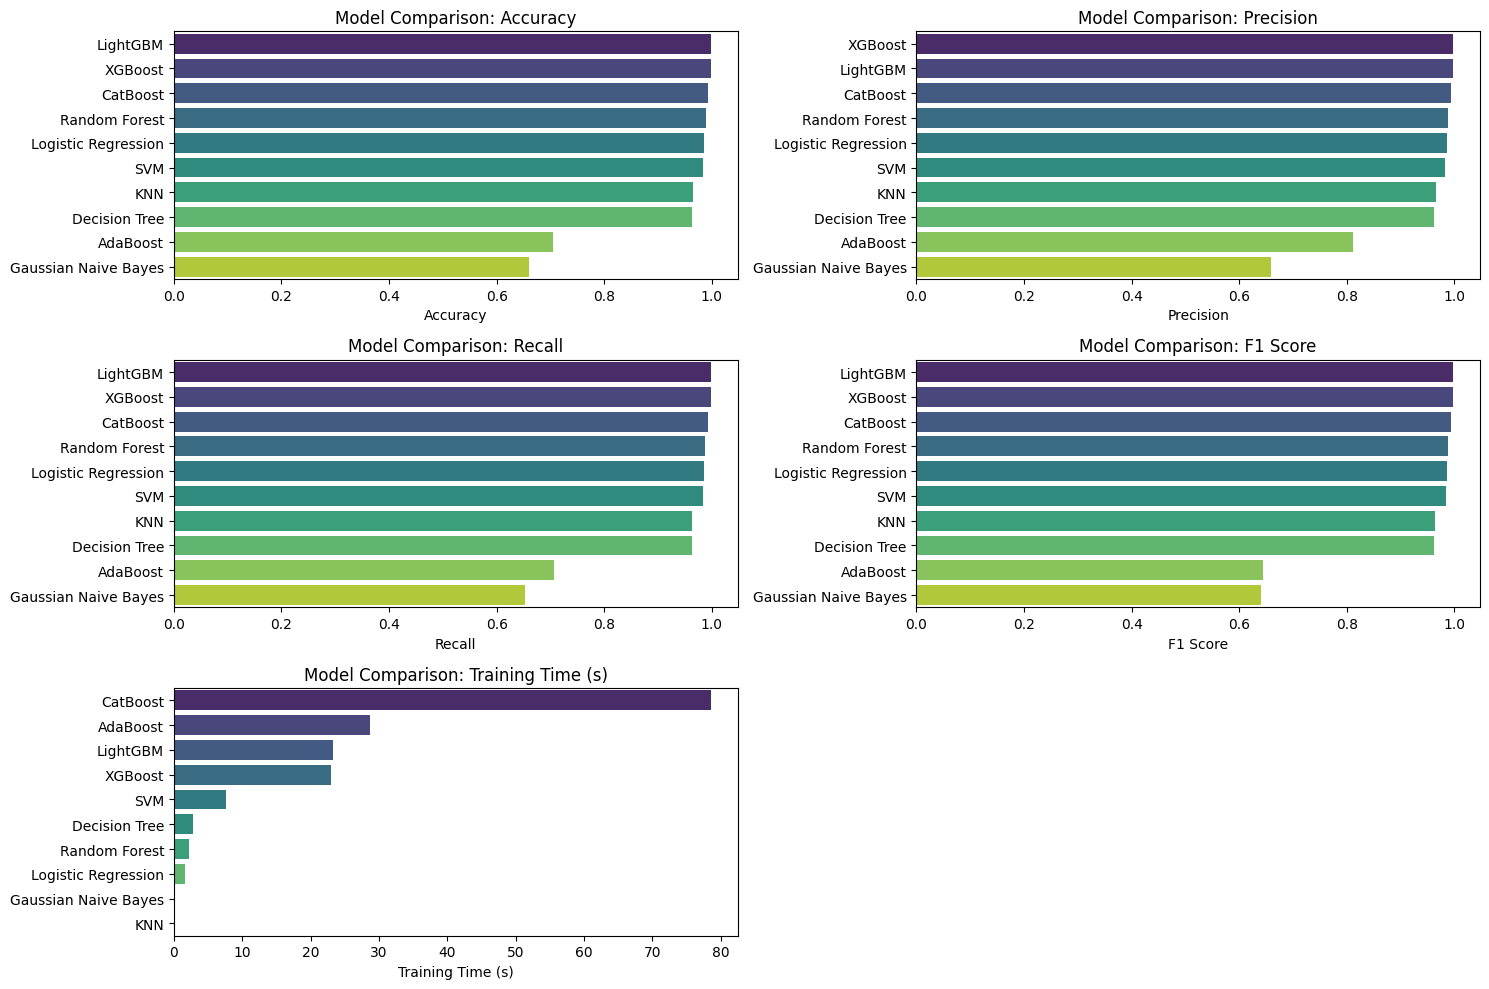

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(C=1, max_iter=500, penalty='l1', solver='liblinear'),
        "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50),
        "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2),
        "KNN": KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform'),
        "SVM": SVC(C=10, gamma='scale', kernel='rbf', probability=True),
        "AdaBoost": AdaBoostClassifier(learning_rate=0.01, n_estimators=50),
        "Gaussian Naive Bayes": GaussianNB(priors=[0.1, 0.1, 0.8], var_smoothing=1e-05),
        "LightGBM": lgb.LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31),
        "XGBoost": xgb.XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.7, use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(depth=6, iterations=100, learning_rate=0.1, verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.barplot(x=scores, y=models, palette='viridis')
        plt.xlabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)





Training Random Forest...

Training Logistic Regression...

Training KNN...

Training Decision Trees...

Training SVM...

Training AdaBoost...

Training GNB...

Training LightGBM...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644408
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 2546
[LightGBM] [Info] Start training from score -1.104495
[LightGBM] [Info] Start training from score -1.099199
[LightGBM] [Info] Start training from score -1.092181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training CatBoost...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


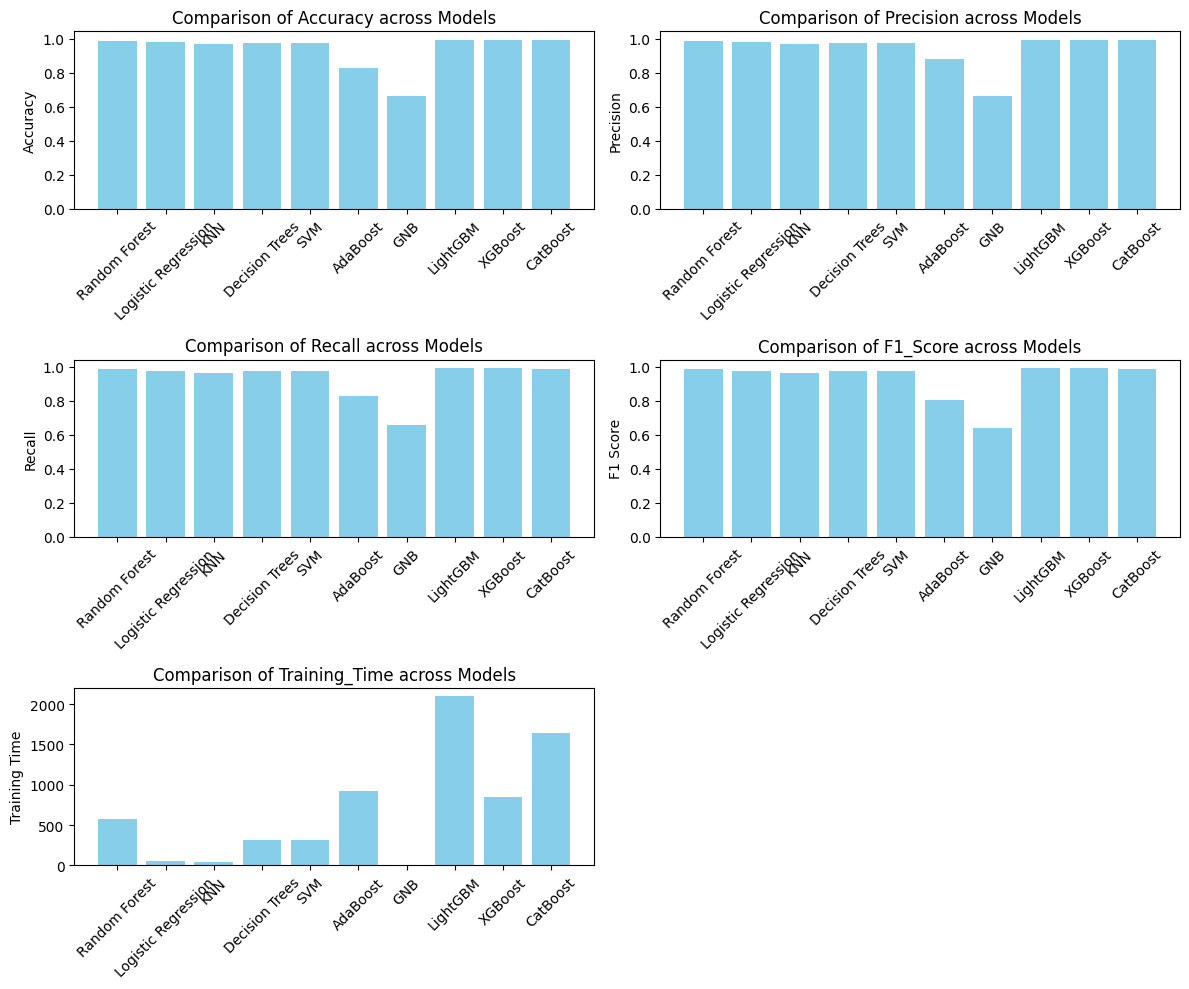

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models and hyperparameters
models = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {
            'C': [0.001, 0.01, 0.1, 1, 10, 75],
            'penalty': ['l1'],
            'solver': ['liblinear'],
            'max_iter': [100, 200, 300, 500]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            'n_neighbors': [1, 3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    "Decision Trees": {
        "model": DecisionTreeClassifier(),
        "param_grid": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "SVM": {
        "model": SVC(),
        "param_grid": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "GNB": {
        "model": GaussianNB(),
        "param_grid": {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "param_grid": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [5, 10],
            'num_leaves': [31, 63]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "param_grid": {
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.5, 0.7]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "param_grid": {
            'iterations': [50, 100],
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6]
        }
    }
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

# Train models
for name, info in models.items():
    print(f"\nTraining {name}...")
    model = info["model"]
    param_grid = info["param_grid"]
    
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Cross-validation
    acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []
    
    for train_idx, val_idx in kf.split(X_scaled):
        X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        best_model.fit(X_train_fold, y_train_fold)
        y_pred_fold = best_model.predict(X_val_fold)
        
        acc_scores.append(accuracy_score(y_val_fold, y_pred_fold))
        prec_scores.append(precision_score(y_val_fold, y_pred_fold, average='weighted'))
        rec_scores.append(recall_score(y_val_fold, y_pred_fold, average='weighted'))
        f1_scores.append(f1_score(y_val_fold, y_pred_fold, average='weighted'))
    
    results[name] = {
        "accuracy": np.mean(acc_scores),
        "precision": np.mean(prec_scores),
        "recall": np.mean(rec_scores),
        "f1_score": np.mean(f1_scores),
        "training_time": end_time - start_time
    }

# Plot results
metrics = ["accuracy", "precision", "recall", "f1_score", "training_time"]
plt.figure(figsize=(12, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    plt.bar(results.keys(), [results[m][metric] for m in results], color='skyblue')
    plt.xticks(rotation=45)
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"Comparison of {metric.title()} across Models")

plt.tight_layout()
plt.show()


In [12]:
results

{'Random Forest': {'accuracy': 0.9868687535046343,
  'precision': 0.9869467391732746,
  'recall': 0.9868687535046343,
  'f1_score': 0.9868724814419538,
  'training_time': 569.7190005779266},
 'Logistic Regression': {'accuracy': 0.9774889775813349,
  'precision': 0.9777534878327732,
  'recall': 0.9774889775813349,
  'f1_score': 0.9774835434197813,
  'training_time': 55.38755774497986},
 'KNN': {'accuracy': 0.9662356653582698,
  'precision': 0.9668778797451321,
  'recall': 0.9662356653582698,
  'f1_score': 0.9660105564287674,
  'training_time': 38.320369720458984},
 'Decision Trees': {'accuracy': 0.9732735209068618,
  'precision': 0.973389218350948,
  'recall': 0.9732735209068618,
  'f1_score': 0.9732417213070251,
  'training_time': 312.6133782863617},
 'SVM': {'accuracy': 0.9760761289045752,
  'precision': 0.9763284097598366,
  'recall': 0.9760761289045752,
  'f1_score': 0.9761265440125273,
  'training_time': 309.12936186790466},
 'AdaBoost': {'accuracy': 0.8283548284240965,
  'precisio

In [13]:
 best_params

{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/kaggle/input/eeg-brainwave-emotion/emotions.csv')

# Inspect the first few rows
print(data.head())




from sklearn.linear_model import Lasso
# Separate features (X) and labels (y)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (NEGATIVE -> 0, NEUTRAL -> 1, POSITIVE -> 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check encoding mapping
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Apply LASSO for feature selection
alpha = 0.09  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")





   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [17]:
selected_features

Index(['mean_4_a', 'max_q_1_a', 'max_q_3_a', 'min_0_a', 'min_q_7_a',
       'logm_8_a', 'logm_9_a', 'logm_42_a', 'logm_64_a', 'entropy0_a',
       'fft_136_a', 'fft_139_a', 'mean_4_b', 'max_q_3_b', 'max_q_13_b',
       'logm_8_b', 'logm_9_b', 'logm_42_b', 'logm_64_b', 'entropy0_b'],
      dtype='object')

In [21]:
X1 = X.columns[selected_features_indices]
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


AttributeError: 'Index' object has no attribute 'columns'

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Plot results
    plot_comparison(results)
    
    return results

# Function to plot comparison graphs
def plot_comparison(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
        models = [x[0] for x in sorted_results]
        scores = [x[1][metric] for x in sorted_results]
        
        sns.lineplot(x=models, y=scores, marker='o', linestyle='-', markersize=8)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric)
        plt.title(f'Model Comparison: {metric}')
        
    plt.tight_layout()
    plt.show()

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)
